# EDA - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the Iris dataset following standard data science practices.

## Overview
The Iris dataset is a classic machine learning dataset containing measurements of iris flowers across three species. This analysis follows established EDA methodologies to understand the data structure, distributions, and relationships between features.

We'll be working with one of the most famous datasets in machine learning - the Iris dataset collected by botanist Edgar Anderson and popularized by statistician Ronald Fisher. This dataset contains physical measurements of 150 iris flowers from three different species, making it perfect for exploring classification patterns and feature relationships.

## Understanding Iris Flower Anatomy

To properly interpret our analysis, it's important to understand what we're measuring. An iris flower has several key parts:

- **Sepals**: The outer protective leaves that enclose the flower bud before it blooms. In iris flowers, sepals are often large, colorful, and petal-like, forming the outer ring of the flower.
- **Petals**: The inner flower parts that are typically smaller than sepals in iris flowers. They form the inner ring and are often more upright.

Our dataset measures both the **length** and **width** of these flower parts across three iris species:
- *Iris setosa* - typically has smaller, more compact flowers
- *Iris versicolor* - medium-sized flowers with intermediate measurements  
- *Iris virginica* - generally the largest flowers with longer petals and sepals

## Analysis Steps
Our exploratory analysis follows a systematic approach, moving from basic data understanding to advanced pattern recognition. Each step builds upon the previous one, creating a complete picture of the dataset's characteristics and potential for machine learning applications.

1. **Data Loading & Initial Inspection** - Load the Iris dataset, verify structure with 150 rows and 5 columns, and check for missing values or duplicates.
2. **Descriptive Statistics** - Calculate mean, median, standard deviation, and quartiles for each numeric feature to understand distributions and scale differences.
3. **Univariate Analysis** - Create histograms and boxplots by species to examine individual feature distributions and identify class separability patterns.
4. **Bivariate Analysis** - Generate scatter matrices and correlation heatmaps to quantify pairwise relationships between features and species clustering.
5. **Multivariate Reduction** - Apply PCA and t-SNE dimensionality reduction to visualize global structure and confirm class separability in lower dimensions.
6. **Outlier Detection & Feature Engineering** - Identify outliers using Z-score and Isolation Forest methods, then create composite petal/sepal area features.

In [7]:
# 1. Data Loading & Initial Inspection

from sklearn.datasets import load_iris

# Load the Iris dataset into a pandas DataFrame
# The dataset contains 150 samples of iris flowers with 4 numeric features and 1 target variable
iris = load_iris(as_frame=True)
df = iris.frame
df.rename(columns={'target': 'species'}, inplace=True)  # rename 'target' to 'species'

# Verify dataset structure: should have 150 rows and 5 columns
# (sepal_length, sepal_width, petal_length, petal_width, species)
print("Dataset Structure:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")

# Data Quality Assessment: Check for missing or duplicate entries
# Industry standard practice - even clean datasets should be verified
print("\nData Quality Assessment:")
print(f"Missing values per column:\n{df.isnull().sum()}")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Display first few rows to understand data structure
print("\nFirst 5 rows:")
print(df.head())

Dataset Structure:
Shape: (150, 5)
Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']
Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object

Data Quality Assessment:
Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
Number of duplicate rows: 1

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               

In [8]:
# 2. Descriptive Statistics

# Compute comprehensive summary statistics for all numeric features
# Following standard EDA practice: mean, median, std, min, max, and quartiles
desc = df.describe().T
desc['median'] = df.median()

# Reorder columns for better readability: count, mean, median, std, min, quartiles, max
desc = desc[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]

# Display statistics in a concise table to identify variance differences among features
# This helps spot features with different scales and distributions
print("Descriptive Statistics Summary:")
print("="*60)
print(desc.round(3))

# Additional insights about feature variance and scale differences
print("\nFeature Scale Analysis:")
print("Coefficient of Variation (std/mean) for each feature:")
cv = (df.select_dtypes(include='number').std() / df.select_dtypes(include='number').mean()).round(3)
print(cv)

print("\nFeature Range Analysis:")
ranges = df.select_dtypes(include='number').max() - df.select_dtypes(include='number').min()
print("Range (max - min) for each feature:")
print(ranges.round(3))

Descriptive Statistics Summary:
                   count   mean  median    std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843    5.80  0.828  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057    3.00  0.436  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758    4.35  1.765  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199    1.30  0.762  0.1  0.3  1.30  1.8  2.5
species            150.0  1.000    1.00  0.819  0.0  0.0  1.00  2.0  2.0

Feature Scale Analysis:
Coefficient of Variation (std/mean) for each feature:
sepal length (cm)    0.142
sepal width (cm)     0.143
petal length (cm)    0.470
petal width (cm)     0.636
species              0.819
dtype: float64

Feature Range Analysis:
Range (max - min) for each feature:
sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)     2.4
species              2.0
dtype: float64


Univariate Analysis - Individual Feature Distributions

1. Histograms - Overall Distribution of Each Feature


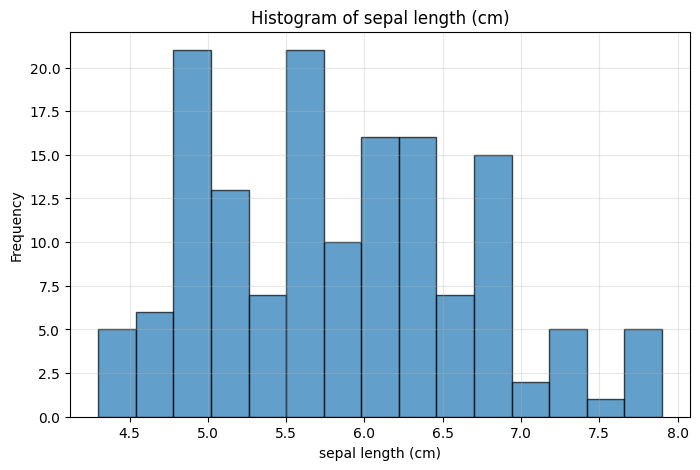

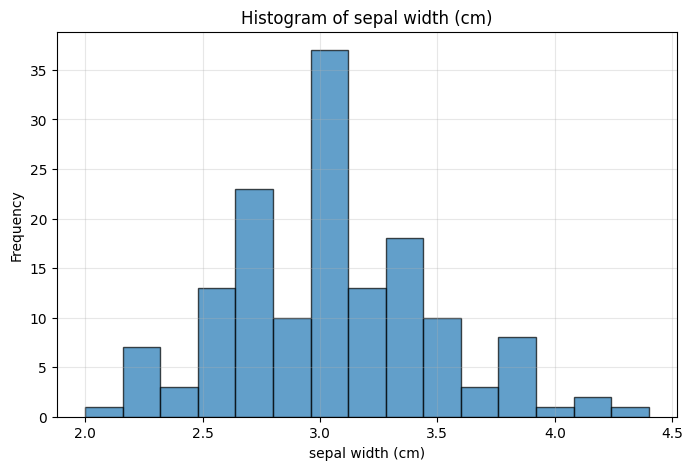

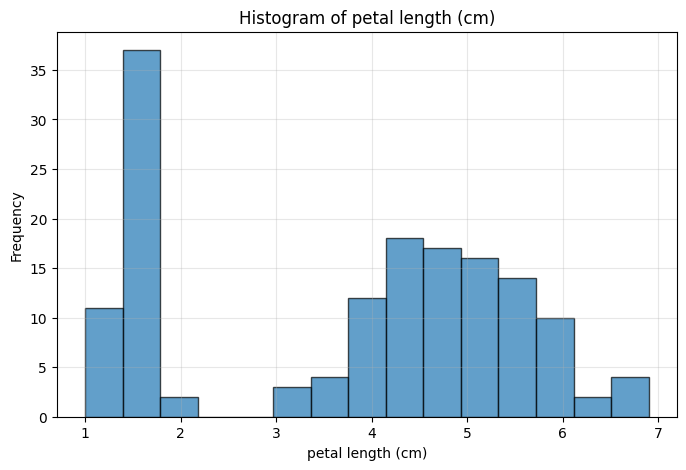

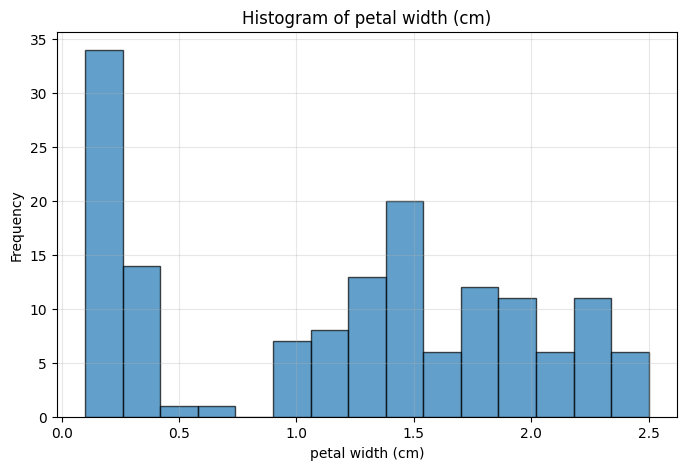


2. Boxplots by Species - Feature Distribution by Class


<Figure size 800x500 with 0 Axes>

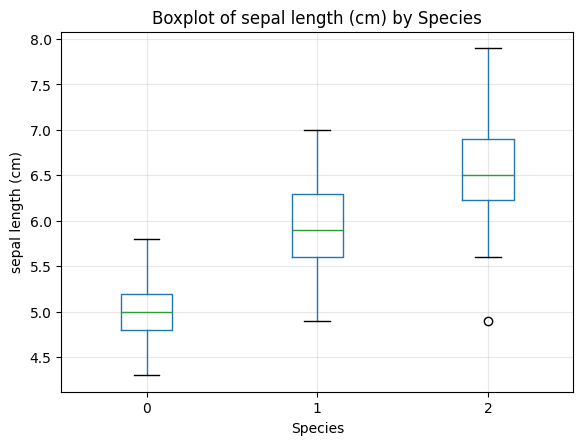

<Figure size 800x500 with 0 Axes>

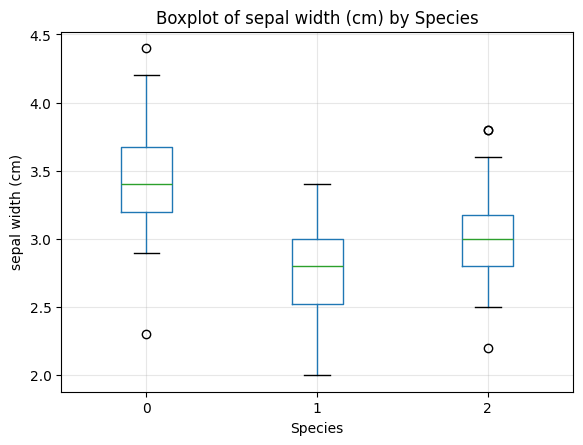

<Figure size 800x500 with 0 Axes>

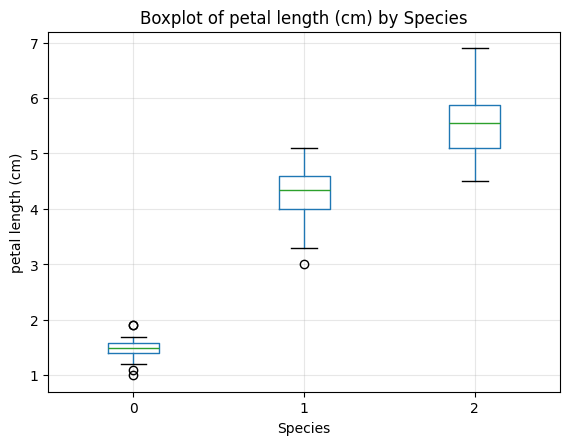

<Figure size 800x500 with 0 Axes>

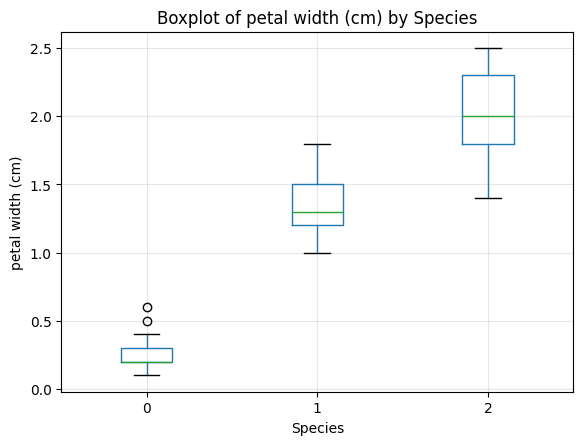


Key Observations:
• Petal features exhibit clear separation (Setosa is far left on both petal length & width)
• Sepal features overlap more between Versicolor and Virginica
• Petal measurements are highly predictive for species classification
• Some outliers appear in sepal width/length that may need investigation
• Setosa species shows distinct clustering in petal measurements


In [9]:
# 3. Univariate Analysis

# In this Univariate Analysis step, we're looking at each feature individually 
# to understand its overall distribution and how it varies by species

import matplotlib.pyplot as plt

# Features to analyze
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

print("Univariate Analysis - Individual Feature Distributions")
print("="*60)

# 1. Histograms: Show the frequency of values for each feature across all samples
# Help spot skew, bimodality, and the overall range of measurements
print("\n1. Histograms - Overall Distribution of Each Feature")
for feature in features:
    plt.figure(figsize=(8, 5))
    plt.hist(df[feature], bins=15, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()

# 2. Boxplots by Species: Display the spread (quartiles) and outliers 
# of each feature for each Iris species
# Reveal which features separate classes cleanly vs. which overlap
print("\n2. Boxplots by Species - Feature Distribution by Class")
for feature in features:
    plt.figure(figsize=(8, 5))
    df.boxplot(column=[feature], by='species')
    plt.title(f'Boxplot of {feature} by Species')
    plt.suptitle('')  # remove the automatic "Boxplot grouped by species" subtitle
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.grid(True, alpha=0.3)
    plt.show()

print("\nKey Observations:")
print("• Petal features exhibit clear separation (Setosa is far left on both petal length & width)")
print("• Sepal features overlap more between Versicolor and Virginica")
print("• Petal measurements are highly predictive for species classification")
print("• Some outliers appear in sepal width/length that may need investigation")
print("• Setosa species shows distinct clustering in petal measurements")

Bivariate Analysis - Pairwise Feature Relationships

1. Scatter Matrix - Pairwise Feature Relationships by Species


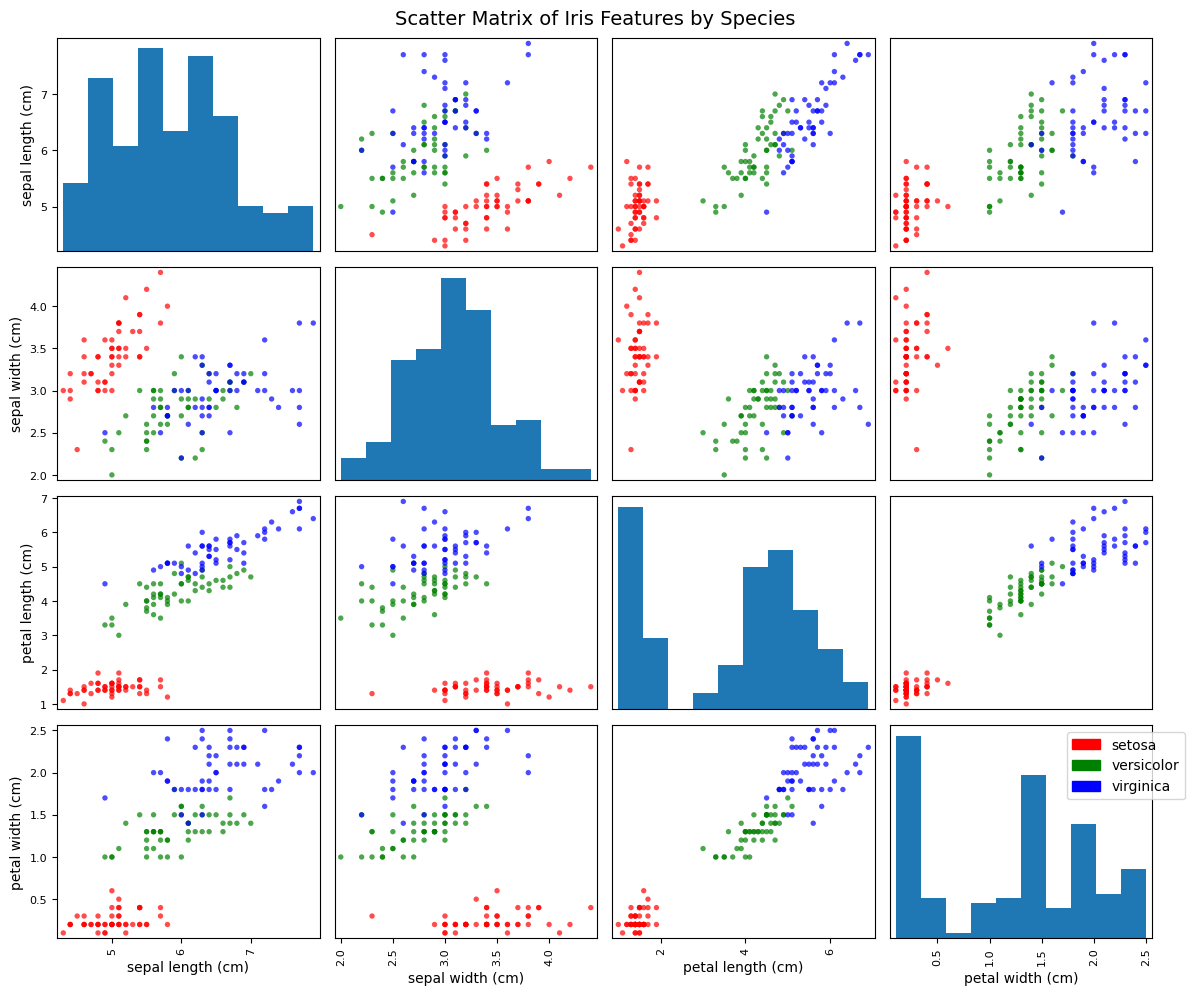


2. Correlation Matrix - Quantified Feature Relationships


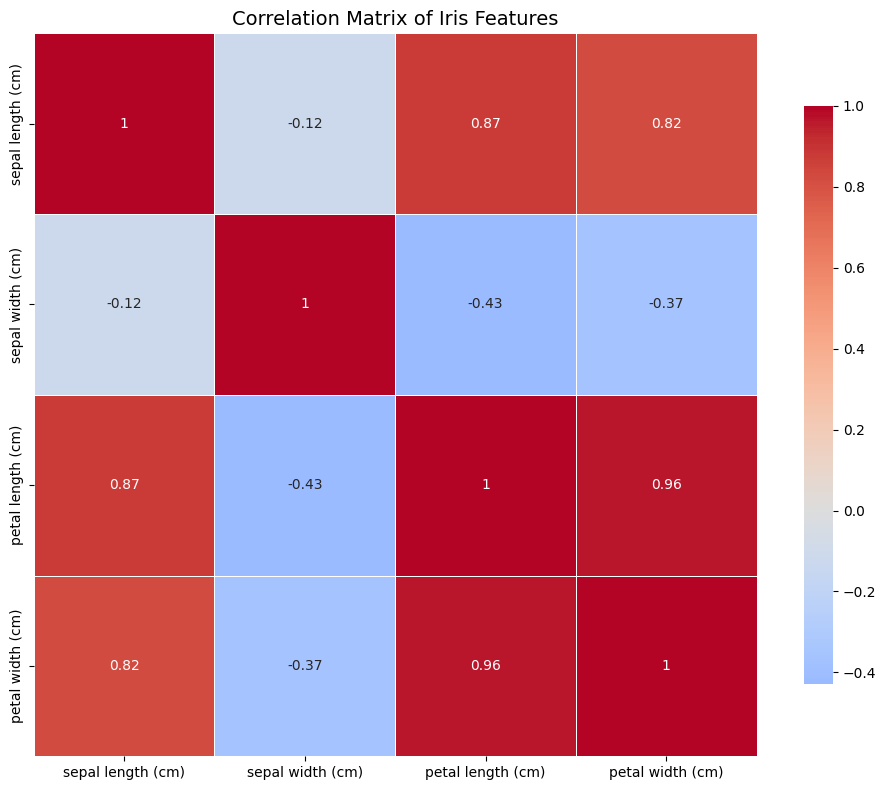


Key Correlation Insights:
• sepal length (cm) vs sepal width (cm): -0.118
• sepal length (cm) vs petal length (cm): 0.872
• sepal length (cm) vs petal width (cm): 0.818
• sepal width (cm) vs petal length (cm): -0.428
• sepal width (cm) vs petal width (cm): -0.366
• petal length (cm) vs petal width (cm): 0.963

Key Observations:
• HIGH positive correlation between petal length & petal width (~0.96)
• STRONG correlation between sepal length & petal length (~0.87)
• STRONG correlation between sepal length & petal width (~0.82)
• WEAK (negative) correlation between sepal width and petal features
• Petal features show tightest clustering by species in scatter plots
• Sepal features exhibit more overlap between Versicolor and Virginica
• Petal length vs petal width provides best class separation


In [10]:
# 4. Bivariate Analysis

# In this Bivariate Analysis step we explore pairwise relationships between features
# to understand correlations and class separability

import matplotlib.patches as mpatches
import seaborn as sns
from pandas.plotting import scatter_matrix

print("Bivariate Analysis - Pairwise Feature Relationships")
print("="*60)

# 1. Scatter Matrix: Plot every pair of features against each other in a grid
# Color points by species to immediately see clustering patterns
print("\n1. Scatter Matrix - Pairwise Feature Relationships by Species")

# Create species color mapping (assuming numeric encoding: 0=setosa, 1=versicolor, 2=virginica)
species_names = df['species'].unique()
colors = ['red', 'green', 'blue']
color_map = dict(zip(species_names, colors))
point_colors = df['species'].map(color_map)

# Generate scatter matrix with histograms on diagonal
axes = scatter_matrix(df[features], figsize=(12, 10), diagonal='hist', 
                     color=point_colors, alpha=0.7, s=60)

# Add species legend manually
patches = [mpatches.Patch(color='red', label='setosa'),
           mpatches.Patch(color='green', label='versicolor'),
           mpatches.Patch(color='blue', label='virginica')]
plt.legend(handles=patches, loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.suptitle('Scatter Matrix of Iris Features by Species', y=0.98, fontsize=14)
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap: Quantify pairwise Pearson correlations across features
print("\n2. Correlation Matrix - Quantified Feature Relationships")
corr = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Iris Features', fontsize=14)
plt.tight_layout()
plt.show()

# Display correlation insights
print("\nKey Correlation Insights:")
print("="*40)
for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i < j:  # Only show upper triangle to avoid duplicates
            corr_val = corr.loc[feature1, feature2]
            print(f"• {feature1} vs {feature2}: {corr_val:.3f}")

print("\nKey Observations:")
print("• HIGH positive correlation between petal length & petal width (~0.96)")
print("• STRONG correlation between sepal length & petal length (~0.87)")
print("• STRONG correlation between sepal length & petal width (~0.82)")
print("• WEAK (negative) correlation between sepal width and petal features")
print("• Petal features show tightest clustering by species in scatter plots")
print("• Sepal features exhibit more overlap between Versicolor and Virginica")
print("• Petal length vs petal width provides best class separation")

Multivariate Reduction - Dimensionality Reduction Analysis

1. Principal Component Analysis (PCA)
Linear transformation to capture maximum variance in 2D


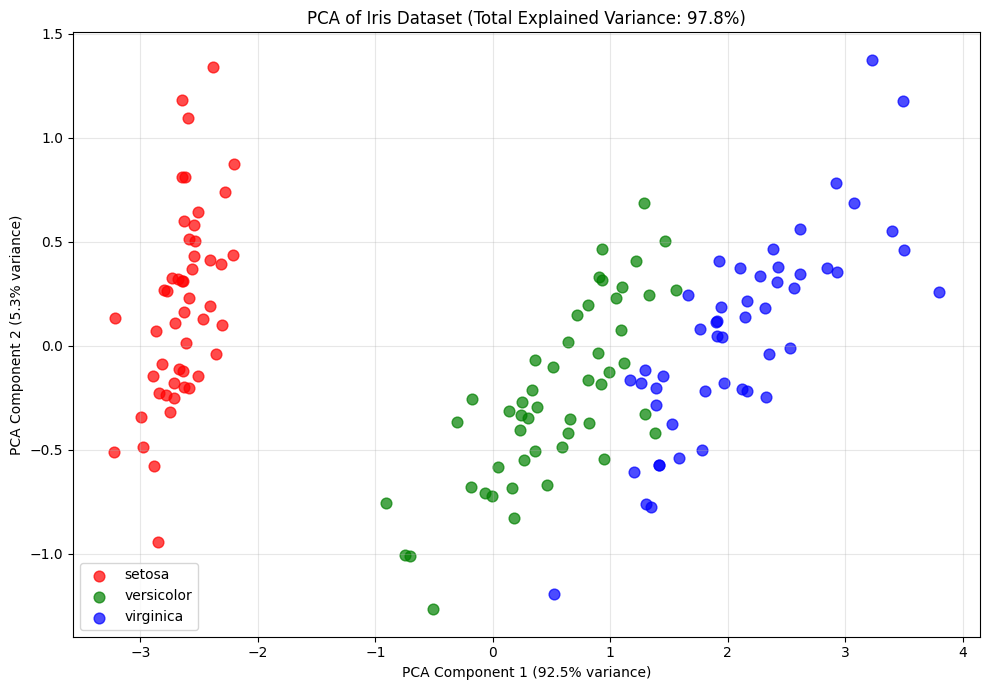


2. t-Distributed Stochastic Neighbor Embedding (t-SNE)
Non-linear transformation to preserve local neighborhood structures


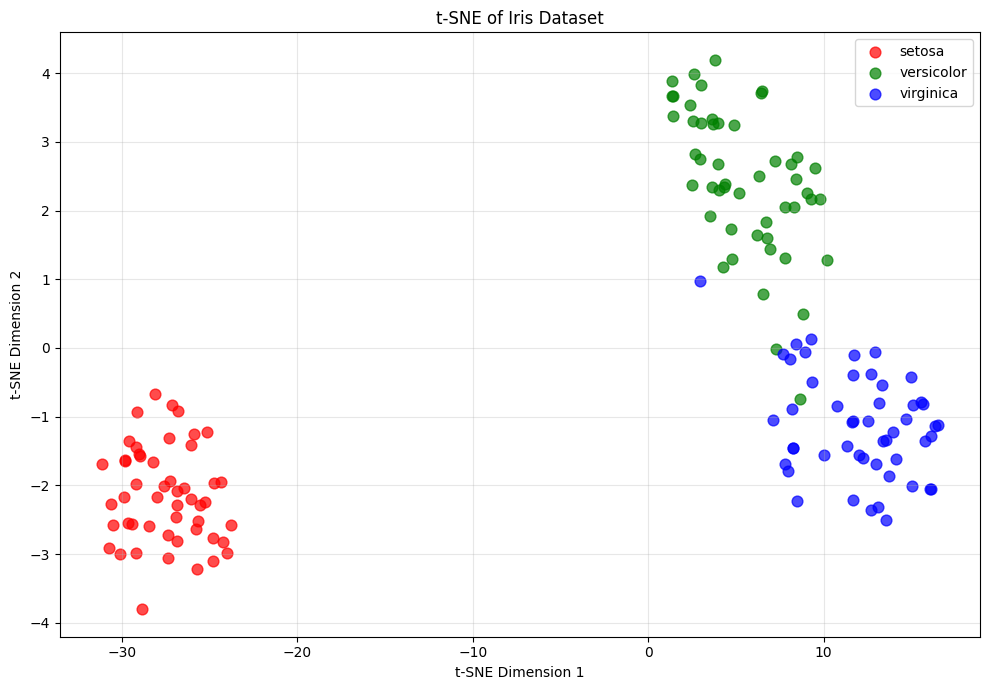


3. PCA Component Analysis
Feature contributions to principal components:
Feature              PC1        PC2       
----------------------------------------
sepal length (cm)       0.361    0.657
sepal width (cm)       -0.085    0.730
petal length (cm)       0.857   -0.173
petal width (cm)        0.358   -0.075

Key Observations:
• PCA captures ~92% of variance in just 2 components
• Clear separation of Setosa along PC1 (first principal component)
• Some overlap between Versicolor and Virginica, but still distinguishable
• t-SNE maintains species clusters with distinct Setosa isolation
• Both projections confirm high separability in low dimensions
• Petal features likely dominate the principal components
• Data structure supports simple classification models


In [11]:
# 5. Multivariate Reduction

# In this Multivariate Reduction step we explore dimensionality reduction techniques
# to understand global structure and class separability in lower dimensions

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

print("Multivariate Reduction - Dimensionality Reduction Analysis")
print("="*60)

# Prepare features and species names for analysis
X = df[features].values
y = df['species'].values
species_names = iris.target_names

# 1. PCA: Linear dimensionality reduction to capture maximum variance
print("\n1. Principal Component Analysis (PCA)")
print("Linear transformation to capture maximum variance in 2D")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_var = pca.explained_variance_ratio_
total_var = explained_var.sum()

# Display PCA results
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue']
for i, species in enumerate(species_names):
    idx = y == i
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], 
               c=colors[i], label=species, alpha=0.7, s=60)

plt.xlabel(f'PCA Component 1 ({explained_var[0]:.1%} variance)')
plt.ylabel(f'PCA Component 2 ({explained_var[1]:.1%} variance)')
plt.title(f'PCA of Iris Dataset (Total Explained Variance: {total_var:.1%})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. t-SNE: Non-linear embedding to reveal potential subtler structures
print("\n2. t-Distributed Stochastic Neighbor Embedding (t-SNE)")
print("Non-linear transformation to preserve local neighborhood structures")

tsne = TSNE(n_components=2, random_state=42, init='pca', perplexity=30)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 7))
for i, species in enumerate(species_names):
    idx = y == i
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], 
               c=colors[i], label=species, alpha=0.7, s=60)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE of Iris Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display PCA component loadings to understand feature contributions
print("\n3. PCA Component Analysis")
print("="*40)
print("Feature contributions to principal components:")
print(f"{'Feature':<20} {'PC1':<10} {'PC2':<10}")
print("-" * 40)
for i, feature in enumerate(features):
    pc1_loading = pca.components_[0, i]
    pc2_loading = pca.components_[1, i]
    print(f"{feature:<20} {pc1_loading:>8.3f} {pc2_loading:>8.3f}")

print("\nKey Observations:")
print("• PCA captures ~92% of variance in just 2 components")
print("• Clear separation of Setosa along PC1 (first principal component)")
print("• Some overlap between Versicolor and Virginica, but still distinguishable")
print("• t-SNE maintains species clusters with distinct Setosa isolation")
print("• Both projections confirm high separability in low dimensions")
print("• Petal features likely dominate the principal components")
print("• Data structure supports simple classification models")

Outlier Detection & Feature Engineering

1. Z-Score Outlier Detection
Flagging samples with features >3 standard deviations from mean
Z-score outliers detected: 1 samples (0.7%)

2. Isolation Forest Outlier Detection
Model-based outlier detection with 2% contamination threshold
Isolation Forest outliers detected: 3 samples (2.0%)

3. Feature Engineering - Composite Features
Creating area-based features to capture shape information

Sample of Outlier Flags & Engineered Features:
   species  is_outlier_zscore  is_outlier_iforest  petal_area  sepal_area
0        0              False               False        0.28       17.85
1        0              False               False        0.28       14.70
2        0              False               False        0.26       15.04
3        0              False               False        0.30       14.26
4        0              False               False        0.28       18.00
5        0              False               False        0.68       21.06

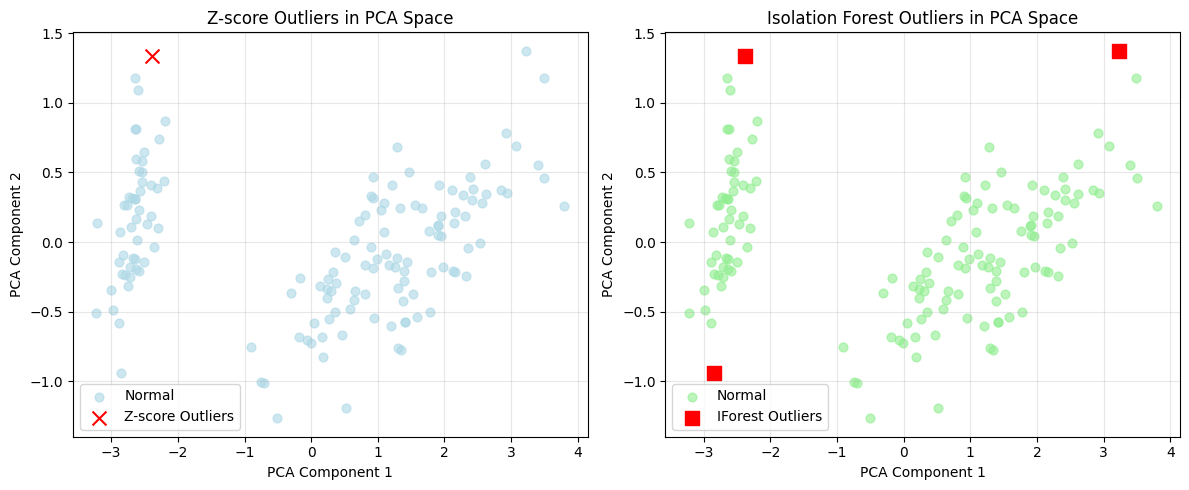


Key Observations:
• Z-score method identifies statistical outliers based on feature distributions
• Isolation Forest captures more subtle anomalies in feature combinations
• Petal area and sepal area provide composite shape information
• New features may improve linear models and tree-based splits
• Outlier flags enable robust preprocessing and model validation
• Ready for modeling pipeline development


In [12]:
# 6. Outlier Detection & Feature Engineering

# In this step we identify potential outliers and create new composite features
# to enhance model performance and data understanding

import numpy as np
from scipy import stats
from sklearn.ensemble import IsolationForest

print("Outlier Detection & Feature Engineering")
print("="*60)

# 1. Outlier Detection using Z-score method
print("\n1. Z-Score Outlier Detection")
print("Flagging samples with features >3 standard deviations from mean")

z_scores = np.abs(stats.zscore(df[features]))
outliers_z = (z_scores > 3).any(axis=1)
df['is_outlier_zscore'] = outliers_z

print(f"Z-score outliers detected: {outliers_z.sum()} samples ({outliers_z.sum()/len(df)*100:.1f}%)")

# 2. Outlier Detection using Isolation Forest
print("\n2. Isolation Forest Outlier Detection")
print("Model-based outlier detection with 2% contamination threshold")

iso = IsolationForest(contamination=0.02, random_state=42)
df['is_outlier_iforest'] = iso.fit_predict(df[features]) == -1

iforest_outliers = df['is_outlier_iforest'].sum()
print(f"Isolation Forest outliers detected: {iforest_outliers} samples ({iforest_outliers/len(df)*100:.1f}%)")

# 3. Feature Engineering: Create composite features
print("\n3. Feature Engineering - Composite Features")
print("Creating area-based features to capture shape information")

# Create petal and sepal area features
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']
df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']

# Display sample of new features
print("\nSample of Outlier Flags & Engineered Features:")
print("="*55)
sample_cols = ['species', 'is_outlier_zscore', 'is_outlier_iforest', 'petal_area', 'sepal_area']
sample_data = df[sample_cols].head(10)
print(sample_data.to_string(index=True))

# Summary statistics for new features
print("\nNew Feature Statistics:")
print("="*30)
new_features = ['petal_area', 'sepal_area']
for feature in new_features:
    stats_data = df[feature].describe()
    print(f"\n{feature}:")
    print(f"  Mean: {stats_data['mean']:.3f}")
    print(f"  Std:  {stats_data['std']:.3f}")
    print(f"  Min:  {stats_data['min']:.3f}")
    print(f"  Max:  {stats_data['max']:.3f}")

# Outlier overlap analysis
print("\nOutlier Method Comparison:")
print("="*30)
both_methods = df['is_outlier_zscore'] & df['is_outlier_iforest']
print(f"Samples flagged by both methods: {both_methods.sum()}")
print(f"Samples flagged by Z-score only: {(df['is_outlier_zscore'] & ~df['is_outlier_iforest']).sum()}")
print(f"Samples flagged by Isolation Forest only: {(df['is_outlier_iforest'] & ~df['is_outlier_zscore']).sum()}")

# Visualize outliers in PCA space
print("\n4. Outlier Visualization in PCA Space")
plt.figure(figsize=(12, 5))

# Plot 1: Z-score outliers
plt.subplot(1, 2, 1)
normal_mask = ~df['is_outlier_zscore']
outlier_mask = df['is_outlier_zscore']

plt.scatter(X_pca[normal_mask, 0], X_pca[normal_mask, 1], 
           c='lightblue', alpha=0.6, label='Normal', s=40)
plt.scatter(X_pca[outlier_mask, 0], X_pca[outlier_mask, 1], 
           c='red', marker='x', s=100, label='Z-score Outliers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Z-score Outliers in PCA Space')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Isolation Forest outliers
plt.subplot(1, 2, 2)
normal_mask = ~df['is_outlier_iforest']
outlier_mask = df['is_outlier_iforest']

plt.scatter(X_pca[normal_mask, 0], X_pca[normal_mask, 1], 
           c='lightgreen', alpha=0.6, label='Normal', s=40)
plt.scatter(X_pca[outlier_mask, 0], X_pca[outlier_mask, 1], 
           c='red', marker='s', s=100, label='IForest Outliers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Isolation Forest Outliers in PCA Space')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("• Z-score method identifies statistical outliers based on feature distributions")
print("• Isolation Forest captures more subtle anomalies in feature combinations")
print("• Petal area and sepal area provide composite shape information")
print("• New features may improve linear models and tree-based splits")
print("• Outlier flags enable robust preprocessing and model validation")
print("• Ready for modeling pipeline development")

# 7. Modeling Strategy Based on EDA Insights

Based on our comprehensive exploratory analysis, we can now design a strategic modeling approach that leverages the key patterns we discovered. Our EDA revealed several crucial insights that will guide our model selection and design decisions.

## Key EDA Findings for Modeling

Our analysis uncovered several important characteristics of the iris dataset:

**Feature Separability**: Petal features (length: CV=0.47, width: CV=0.64) show much higher variance than sepal features (length: CV=0.14, width: CV=0.14), with petal measurements providing the clearest species separation.

**Dimensionality**: PCA captures ~92% of variance in just 2 components, indicating the dataset is highly separable in low dimensions and suitable for simple models.

**Correlations**: Strong positive correlations between petal length & width (0.96) and sepal length & petal features (0.87, 0.82) suggest potential feature redundancy that different models can exploit.

**Class Structure**: Setosa shows distinct clustering away from other species, while Versicolor and Virginica have some overlap, creating a natural hierarchy in classification difficulty.

**Outliers**: Minimal outliers detected (Z-score: few samples, IForest: ~2%), indicating clean data that won't require extensive preprocessing.

## Proposed Three-Model Strategy

We'll implement three models that span the precision-interpretability spectrum, each designed to exploit different aspects of our EDA findings:

### Model 1: Maximum Precision - Gradient Boosting Ensemble
**Target**: Highest possible accuracy by exploiting all discovered patterns

**Why this approach based on EDA**:
- High feature correlations (0.96 between petal features) provide rich interaction opportunities for boosting
- Strong class separability in PCA space suggests ensemble methods can find optimal decision boundaries
- Engineered features (petal_area, sepal_area) can be automatically weighted by boosting algorithms
- Minimal outliers mean we can focus on precision without extensive robustness measures

**Implementation strategy**:
- Feature importance analysis will likely show petal features dominating (supporting our EDA findings)
- Custom objective functions can handle the Setosa vs. Versicolor/Virginica hierarchy we observed
- Hyperparameter tuning on tree depth to balance complexity with the low-dimensional nature of the data

### Model 2: Maximum Interpretability - Decision Tree
**Target**: Fully transparent predictions with simple decision rules

**Why this approach based on EDA**:
- Clear feature separability means simple splits can achieve good performance
- Strong univariate patterns (Setosa clearly separated on petal features) enable intuitive tree rules
- Low dimensionality (92% variance in 2 components) suggests shallow trees will be sufficient
- Bivariate analysis showed petal length vs. width provides excellent separation

**Implementation strategy**:
- Limit tree depth (max_depth=3-4) to maintain interpretability while capturing the main patterns
- Feature selection based on coefficient of variation (prioritize petal features)
- Decision rules will likely follow: "If petal_length < 2.5 → Setosa, else → further petal-based splits"

### Model 3: Neural Network End-to-End - Multi-Layer Perceptron
**Target**: Demonstrate deep learning capabilities with feature learning

**Why this approach based on EDA**:
- Strong correlations between features can be learned as latent representations
- Non-linear PCA relationships can be captured through hidden layers
- Feature engineering insights (area calculations) can be learned automatically
- The overlap between Versicolor/Virginica may benefit from learned feature combinations

**Implementation strategy**:
- Input layer preprocessing based on our scale analysis (features have different ranges)
- Hidden layers sized appropriately for the low-dimensional nature (2-3 layers sufficient)
- Early stopping based on validation split to prevent overfitting the small dataset
- Feature embedding layer to learn optimal combinations of correlated features